In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from DecisionBoundaryPlots2D import decBoundary

In [3]:
data=pd.read_csv("metricdata.csv")
data

,x,y,t
0,170.18,56699.000,0
1,172.72,63502.880,1
2,170.18,64410.064,0
3,152.40,49895.120,2
4,162.56,43998.424,2
...,...,...,...
205,200.66,74842.680,3
206,190.50,72574.720,0
207,180.34,77110.640,0
208,165.10,53070.264,2


# (a)

In [7]:
X=np.c_[data["x"],data["y"]]
y=data["t"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [9]:
knn=KNeighborsClassifier()

In [10]:
from sklearn.model_selection import GridSearchCV

# (b)

In [11]:
param_grid = {
    'n_neighbors':np.arange(1,11) 
}

In [12]:
grid_search = GridSearchCV(
    knn, param_grid, cv=10, scoring='accuracy')

In [13]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [14]:
grid_search.best_score_

0.7619047619047619

In [15]:
grid_search.best_estimator_.n_neighbors

1

In [16]:
p=grid_search.predict(X_test)

In [17]:
np.sum(p==y_test)/len(y_test)

0.6666666666666666

In [18]:
bestKNN=grid_search.best_estimator_

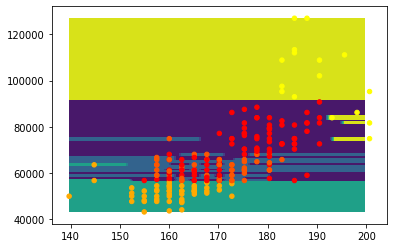

In [20]:
decBoundary(X, y,1,bestKNN)

# (c)

In [21]:
grid_search = GridSearchCV(
    knn, param_grid, cv=5, scoring='accuracy')

In [22]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [23]:
grid_search.best_score_

0.7407407407407407

In [24]:
grid_search.best_estimator_.n_neighbors

3

In [25]:
p=grid_search.predict(X_test)

In [26]:
np.sum(p==y_test)/len(y_test)

0.7142857142857143

In [27]:
bestKNN=grid_search.best_estimator_

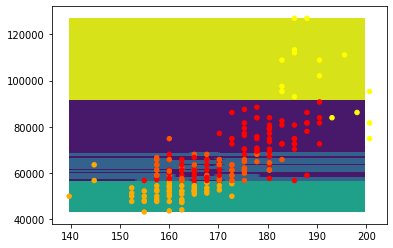

In [28]:
decBoundary(X, y,1,bestKNN)

# (d)

In [39]:
from sklearn import preprocessing

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
data=pd.read_csv("metricdata.csv")
data

,x,y,t
0,170.18,56699.000,0
1,172.72,63502.880,1
2,170.18,64410.064,0
3,152.40,49895.120,2
4,162.56,43998.424,2
...,...,...,...
205,200.66,74842.680,3
206,190.50,72574.720,0
207,180.34,77110.640,0
208,165.10,53070.264,2


In [54]:
X = np.array(data["x"],data["y"]).reshape(-1,1)
y = np.array(data["t"]).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=42)

In [55]:
rescaled_X = scaler.fit_transform(X)
rescaled_X

array([[0.5       ],
       [0.54166667],
       [0.5       ],
       [0.20833333],
       [0.375     ],
       [0.25      ],
       [1.        ],
       [0.25      ],
       [0.66666667],
       [0.45833333],
       [0.20833333],
       [0.66666667],
       [0.70833333],
       [0.        ],
       [0.375     ],
       [0.41666667],
       [0.41666667],
       [0.66666667],
       [0.54166667],
       [0.66666667],
       [0.5       ],
       [0.625     ],
       [0.54166667],
       [0.70833333],
       [0.66666667],
       [0.41666667],
       [0.5       ],
       [0.45833333],
       [0.33333333],
       [0.29166667],
       [0.66666667],
       [0.375     ],
       [0.375     ],
       [0.58333333],
       [0.83333333],
       [0.41666667],
       [0.5       ],
       [0.41666667],
       [0.83333333],
       [0.08333333],
       [0.54166667],
       [0.75      ],
       [0.54166667],
       [0.29166667],
       [0.54166667],
       [0.79166667],
       [0.33333333],
       [0.75 

In [56]:

rescaled_Y = scaler.fit_transform(y)
rescaled_Y

array([[0.        ],
       [0.33333333],
       [0.        ],
       [0.66666667],
       [0.66666667],
       [0.66666667],
       [1.        ],
       [0.66666667],
       [0.33333333],
       [0.33333333],
       [0.66666667],
       [0.        ],
       [0.33333333],
       [0.66666667],
       [0.66666667],
       [0.        ],
       [0.33333333],
       [0.        ],
       [0.33333333],
       [0.        ],
       [0.33333333],
       [0.33333333],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.66666667],
       [0.66666667],
       [0.66666667],
       [0.        ],
       [0.66666667],
       [0.        ],
       [0.66666667],
       [0.66666667],
       [0.33333333],
       [0.        ],
       [0.33333333],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.66666667],
       [0.        ],
       [0.        ],
       [0.66666667],
       [0.33333333],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

# repeating (b)

In [57]:
param_grid = {
    'n_neighbors':np.arange(1,11) 
}

In [58]:
grid_search = GridSearchCV(
    knn, param_grid, cv=10, scoring='accuracy')

In [59]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [60]:
grid_search.best_score_

0.5661375661375662

In [61]:
grid_search.best_estimator_.n_neighbors

8

In [62]:
p=grid_search.predict(X_test)

In [70]:
accuracy = np.sum(p==y_test)/len(y_test)
accuracy

7.190476190476191

In [71]:
bestKNN=grid_search.best_estimator_

In [72]:
from DecisionBoundaryPlots2D import decBoundary

In [75]:
decBoundary(X, y,0.5,grid_search.best_estimator_)

IndexError: index 1 is out of bounds for axis 1 with size 1